In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [138]:
plt.rcParams["figure.figsize"] = 16,9
plt.rcParams["font.size"] = 16
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.titlecolor"] = "white"
plt.rcParams["axes.labelcolor"] = "white"
plt.rcParams["ytick.color"] = "white"
plt.rcParams["xtick.color"] = "white"

In [41]:
exoplanet = pd.read_csv("exoplanet.csv")
exoplanet.head()

,# name,planet_status,mass,mass_error_min,mass_error_max,mass_sini,mass_sini_error_min,mass_sini_error_max,radius,radius_error_min,...,star_sp_type,star_age,star_age_error_min,star_age_error_max,star_teff,star_teff_error_min,star_teff_error_max,star_detected_disc,star_magnetic_field,star_alternate_names
0,1RXS 1609 b,Confirmed,14.0,3.0,2.0,NaN,NaN,NaN,1.70,NaN,...,K7V,0.011,0.002,0.002,4060.0,200.0,200.0,NaN,NaN,"1RXS1609, 1RXS J1609, 1RXS J160929"
1,2M 0219-39 b,Confirmed,13.9,1.1,1.1,NaN,NaN,NaN,1.44,0.03,...,M6,NaN,NaN,NaN,3064.0,76.0,76.0,NaN,NaN,2MASS J0292210-3925225
2,2M 2140+16 b,Confirmed,20.0,20.0,80.0,NaN,NaN,NaN,0.92,0.39,...,NaN,NaN,NaN,NaN,2300.0,80.0,80.0,NaN,NaN,NaN
3,2M 2206-20 b,Confirmed,30.0,20.0,70.0,NaN,NaN,NaN,1.30,0.18,...,NaN,NaN,NaN,NaN,2350.0,80.0,80.0,NaN,NaN,NaN
4,2M0355,Confirmed,28.0,2.0,2.0,NaN,NaN,NaN,1.22,0.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


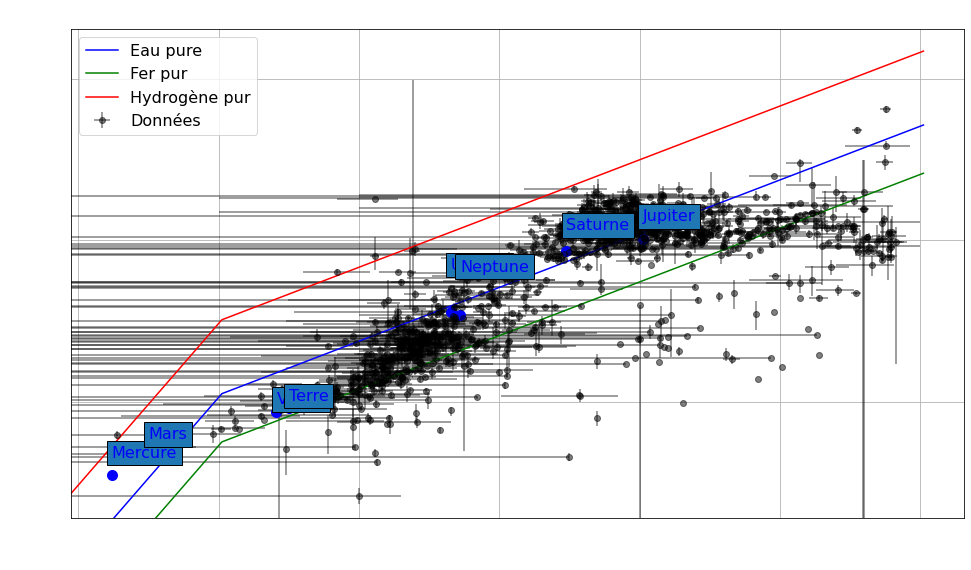

In [139]:
masses = exoplanet["mass"]
radii = exoplanet["radius"]
masses_err = [exoplanet["mass_error_min"], exoplanet["mass_error_max"]]
radii_err = [exoplanet["radius_error_min"], exoplanet["radius_error_max"]]

planetes = [
    ("Mercure", 3.285e23, 2439.7e3, .01), ("Venus", 4.9e24, 6050e3, .01), ("Terre", 6e24, 6400e3, .01), ("Mars", 6e23, 3389e3, .01),
    ("Jupiter", 2e27, 71e6, .3), ("Saturne", 5.7e26, 60e6, .3), ("Uranus", 86e24, 25e6, .3), ("Neptune", 1e26, 24e6, .3)
]

M_J = 1.898e27 # kg
R_J = 69911e3 # m
rho_eau = 997
rho_fer = 7874
rho_h2 = 42

rayon = lambda M, rho: np.cbrt(3 * M / (4 * np.pi * rho)) / R_J

x = np.linspace(0, 2e29, int(1e5))
y_eau = rayon(x, rho_eau)
y_fer = rayon(x, rho_fer)
y_h2 = rayon(x, rho_h2)

plt.errorbar(masses, radii, yerr=radii_err, xerr=masses_err, linestyle="", marker="o", color="k",
             label="Données", alpha=.5)

plt.plot(x / M_J, y_eau, "b", label="Eau pure")
plt.plot(x / M_J, y_fer, "g", label="Fer pur")
plt.plot(x / M_J, y_h2, "r", label="Hydrogène pur")

for p, x, y, offset in planetes:
    plt.plot(x / M_J, y / R_J, "ob", markersize=10)
    plt.text(x / M_J, y / R_J + offset, p, color="b", bbox=dict(boxstyle="square"))

plt.yscale("log")
plt.xscale("log")
#plt.xlim((1e-3, 1e2))
#plt.ylim((1e-1, 5e4))
plt.xlabel("Masse (masse jupiter)")
plt.ylabel("Rayon (rayon jupiter)")
plt.title("Masse et rayon des exoplanètes connues")
plt.legend()
plt.show()